## Introduction to DES OpenEO backend

The [OpenEO API](https://api.openeo.org/) is a standardized interface designed to simplify and harmonize the use of cloud-based Earth observation (EO) data processing services. It enables users to access and process EO data from various providers using a consistent API, making it easier to integrate and automate workflows.

Digital Earth Sweden (DES) has implemented the OpenEO backend as their API solution. DES initiative aims at making satellite data more accessible and usable for various applications.

The [DES OpenEO API](https://openeo.digitalearth.se) is a platform designed to facilitate access to Earth observation data of Sweden and processing capabilities.

In [6]:
# Import some commonly used python packages
import openeo
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [20, 10]

# Import some convenience modules made for this tutorial
from config import user,passwd,eo_service_url # This module contains some notebook specifics
from demo_helpers import show_result # We have written some helper functions here
from demo_regions import s2, s3 # We have defined a few regions of interest to de-clutter the code

In [2]:
# Connect to DES OpenEO backend
connection = openeo.connect(eo_service_url)
connection.authenticate_basic(username=user, password=passwd)

<Connection to 'https://openeo.digitalearth.se/' with BasicBearerAuth>

# Collection

A “collection” in the context of the OpenEO API refers to a dataset or a group of datasets available for analysis and processing. These collections typically include various types of Earth observation data, such as satellite imagery, which come with detailed metadata describing their content and structure. Users can access and query these collections to perform different types of geospatial analyses.

In [4]:
# To list all collection ids provided by the back-end
connection.list_collection_ids()

['NMD_Produktivitet_v1_1',
 'nmd2018bas_ogeneraliserad_v1_1',
 's2_msi_l1c',
 's2_msi_l2a',
 's3_olci_l2wfr']

In [5]:
# To get the complete metadata of a particular collection
connection.describe_collection('s2_msi_l2a')

{'stac_version': '1.0.0',
 'type': 'Collection',
 'id': 's2_msi_l2a',
 'title': 's2_msi_l2a',
 'description': 'Sentinel-2 MSI L2A Cloud-Optimized GeoTIFFs',
 'license': 'CC-BY-4.0',
 'extent': {'spatial': {'bbox': [[-180.0,
     53.071256525792954,
     179.52092178474308,
     72.09958113028067]]},
  'temporal': {'interval': [['2018-03-01T10:30:19.027000Z',
     '2024-08-22T10:46:19.024000Z']]}},
 'links': [{'rel': 'root',
   'href': 'https://explorer.digitalearth.se/stac',
   'type': 'application/json',
   'title': 'Default ODC Explorer instance'},
  {'rel': 'self',
   'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l2a'},
  {'rel': 'items',
   'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l2a/items'},
  {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
   'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l2a/queryables'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2018-3'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2018-4'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2018-5'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2018-6'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2018-7'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2018-8'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2018-9'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2018-10'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2018-11'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2018-12'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-1'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-2'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-3'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-4'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-5'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-6'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-7'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-8'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-9'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-10'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-11'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2019-12'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2020-1'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2020-2'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2020-3'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2020-4'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2020-5'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2020-6'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2020-7'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2020-8'},
  {'rel': 'child',
   'href': 'https://explorer.digitalearth.se/stac/catalogs/s2_msi_l2a/2020-9'},
  {'rel': 'child',
   '

In [6]:
# To list the basic metadata of all collections
connection.list_collections()

[{'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 'NMD_Produktivitet_v1_1',
  'title': 'NMD_Produktivitet_v1_1',
  'description': 'Tilläggsskikt produktivitet',
  'license': 'CC0-1.0',
  'extent': {'spatial': {'bbox': [[8.000013270356117,
      54.99999600913266,
      25.000000809024733,
      68.99999769658118]]},
   'temporal': {'interval': [['2023-04-27T06:26:59.086425Z',
      '2023-04-27T06:26:59.086425Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1/items'},
   {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1/queryables'},
   {'rel': 'child',
    'href': 'https://explorer.digitalearth.se/stac/catalogs/NMD_Produktivitet_v1_1/2023-4'}],
  'cube:dimensions': {'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [8.000013270356117, 25.000000809024733],
    'reference_system': 4326},
   'y': {'type': 'spatial',
    'axis': 'y',
    'extent': [54.99999600913266, 68.99999769658118],
    'reference_system': 4326},
   't': {'type': 'temporal',
    'extent': ['2023-04-27T06:26:59.086425Z', '2023-04-27T06:26:59.086425Z'],
    'step': None},
   'bands': {'type': 'bands', 'values': ['produktivitet']}},
  'summaries': {}},
 {'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 'nmd2018bas_ogeneraliserad_v1_1',
  'title': 'nmd2018bas_ogeneraliserad_v1_1',
  'description': 'Nationella marktäckedata (NMD)',
  'license': 'CC0-1.0',
  'extent': {'spatial': {'bbox': [[8.000013270356117,
      54.99999600913266,
      25.000000809024733,
      68.99999769658118]]},
   'temporal': {'interval': [['2023-04-25T14:23:34.643233Z',
      '2023-04-25T14:23:34.643233Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1/items'},
   {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1/queryables'},
   {'rel': 'child',
    'href': 'https://explorer.digitalearth.se/stac/catalogs/nmd2018bas_ogeneraliserad_v1_1/2023-4'}],
  'cube:dimensions': {'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [8.000013270356117, 25.000000809024733],
    'reference_system': 4326},
   'y': {'type': 'spatial',
    'axis': 'y',
    'extent': [54.99999600913266, 68.99999769658118],
    'reference_system': 4326},
   't': {'type': 'temporal',
    'extent': ['2023-04-25T14:23:34.643233Z', '2023-04-25T14:23:34.643233Z'],
    'step': None},
   'bands': {'type': 'bands', 'values': ['basskikt']}},
  'summaries': {}},
 {'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 's2_msi_l1c',
  'title': 's2_msi_l1c',
  'description': 'Sentinel-2 Level1C - Ortho Rectified Top of Atmosphere Reflectance',
  'license': 'CC-BY-4.0',
  'extent': {'spatial': {'bbox': [[8.999626281785673,
      54.9150072246983,
      26.330890180835535,
      69.4096405079696]]},
   'temporal': {'interval': [['2015-07-04T10:10:06.027000Z',
      '2024-08-21T10:30:21.024000Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l1c'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l1c/items'

## Datacube
When working with satellite data in OpenEO, we often use datacubes, which provide a structured way to handle complex, multi-dimensional EO data. Open DataCube provides a way of catalouging earth observation data through a PostgreSQL database. The Datacube itself is a multi-dimensional array of values representing Earth observation data. 

### From Collections to Datacubes:

In OpenEO, we begin by loading **collections** (datasets containing satellite imagery and other geospatial data) into a datacube. A collection is essentially a large repository of data, and when we specify a spatial extent, time range, and spectral bands, we extract a subset of this collection to create a datacube. This datacube is a more manageable and targeted representation of the data, ready for analysis.

In [3]:
datacube=connection.load_collection(collection_id=s2.s2_msi_l2a,
                         spatial_extent=s2.bbox.karlstad_mini_land,
                         temporal_extent=s2.timespans.one_image,
                        bands=['b04'],
                        )
datacube

In [ ]:
# Download the data as Gtiff
s2_image_data2 = datacube.download(format="gtiff")

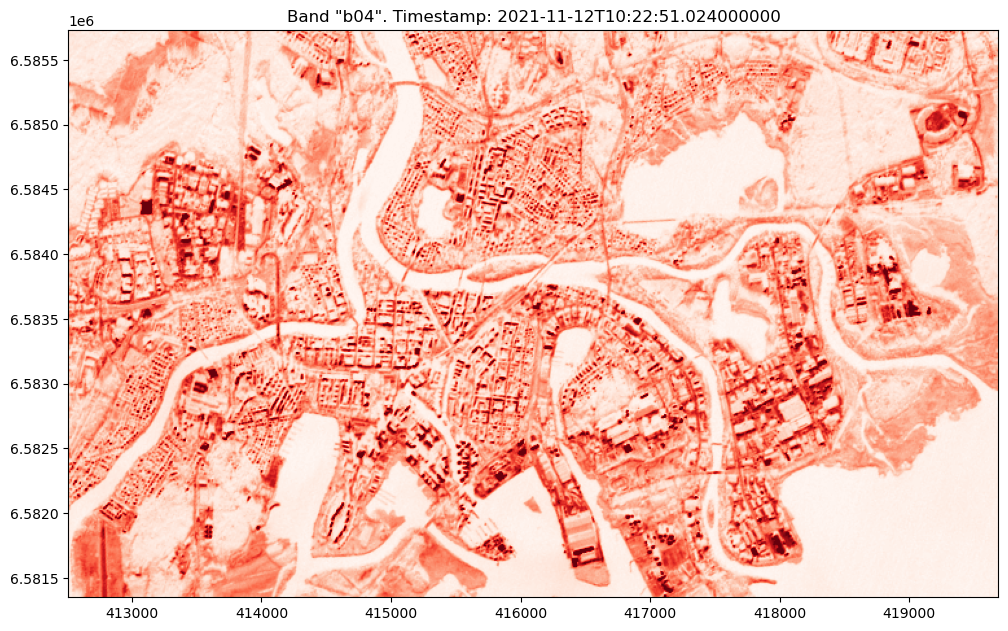

array([[[[238., 254., 312., ..., 465., 410., 438.],
         [273., 330., 332., ..., 493., 367., 333.],
         [321., 383., 313., ..., 298., 230., 279.],
         ...,
         [214., 228., 245., ..., 233., 158., 217.],
         [277., 290., 269., ..., 238., 193., 195.],
         [244., 247., 262., ..., 187., 180., 184.]]]])

In [7]:
# 3. Use our tutorial helper function to view the data!
show_result(s2_image_data2, colormap="Reds")

## OpenEO Processes
We can utilize the DES OpenEO backend to do some heavy lifting in EO analysis. In EO analysis, processing large datasets on your own laptop can be extremely time-consuming and resource-intensive. This is where openEO provides a significant advantage. OpenEO allows you to construct and execute complex calculations, known as processes, on powerful backend servers rather than on your local machine. This approach frees up your resources and ensures that heavy computations are handled efficiently.

In [ ]:
# Explore list of processes

connection.list_processes()

[{'id': 'absolute',
  'summary': 'Absolute value',
  'description': 'Computes the absolute value of a real number `x`, which is the "unsigned" portion of x and often denoted as *|x|*.\n\nThe no-data value `null` is passed through and therefore gets propagated.',
  'categories': ['math'],
  'parameters': [{'name': 'x',
    'description': 'A number.',
    'schema': {'type': ['number', 'null'],
     'minItems': 0.0,
     'deprecated': False}}],
  'returns': {'description': 'The computed absolute value.',
   'schema': {'type': ['number', 'null']}},
  'examples': [{'arguments': {'x': 0}, 'returns': 0},
   {'arguments': {'x': 3.5}, 'returns': 3.5},
   {'arguments': {'x': -0.4}, 'returns': 0.4},
   {'arguments': {'x': -3.5}, 'returns': 3.5}],
  'links': [{'rel': 'about',
    'href': 'http://mathworld.wolfram.com/AbsoluteValue.html',
    'title': 'Absolute value explained by Wolfram MathWorld'}],
  'process_graph': {'lt': {'process_id': 'lt',
    'result': False,
    'arguments': {'x': {'from_parameter': 'x'}, 'y': 0}},
   'multiply': {'process_id': 'multiply',
    'result': False,
    'arguments': {'x': {'from_parameter': 'x'}, 'y': -1}},
   'if': {'process_id': 'if',
    'result': True,
    'arguments': {'value': {'from_node': 'lt'},
     'accept': {'from_node': 'multiply'},
     'reject': {'from_parameter': 'x'}}}}},
 {'id': 'add_dimension',
  'summary': 'Add a new dimension',
  'description': 'Adds a new named dimension to the data cube.\n\nAfterwards, the dimension can be referred to with the specified `name`. If a dimension with the specified name exists, the process fails with a `DimensionExists` exception. The dimension label of the dimension is set to the specified `label`.',
  'categories': ['cubes'],
  'parameters': [{'name': 'data',
    'description': 'A data cube to add the dimension to.',
    'schema': {'type': 'object',
     'subtype': 'raster-cube',
     'minItems': 0.0,
     'deprecated': False}},
   {'name': 'name',
    'description': 'Name for the dimension.',
    'schema': {'type': 'string', 'minItems': 0.0, 'deprecated': False}},
   {'name': 'label',
    'description': 'A dimension label.',
    'schema': [{'type': 'number', 'minItems': 0.0, 'deprecated': False},
     {'type': 'string', 'minItems': 0.0, 'deprecated': False}]},
   {'name': 'type',
    'description': 'The type of dimension, defaults to `other`.',
    'optional': True,
    'default': 'other',
    'schema': {'type': 'string',
     'enum': ['spatial', 'temporal', 'bands', 'other'],
     'minItems': 0.0,
     'deprecated': False}}],
  'returns': {'description': 'The data cube with a newly added dimension. The new dimension has exactly one dimension label. All other dimensions remain unchanged.',
   'schema': {'type': 'object'}},
  'exceptions': {'DimensionExists': {'message': 'A dimension with the specified name already exists.',
    'http': 400}}},
 {'id': 'add',
  'summary': 'Addition of two numbers',
  'description': 'Sums up the two numbers `x` and `y` (*`x + y`*) and returns the computed sum.\n\nNo-data values are taken into account so that `null` is returned if any element is such a value.\n\nThe computations follow [IEEE Standard 754](https://ieeexplore.ieee.org/document/8766229) whenever the processing environment supports it.',
  'categories': ['math'],
  'parameters': [{'name': 'x',
    'description': 'The first summand.',
    'schema': {'type': ['number', 'null'],
     'minItems': 0.0,
     'deprecated': False}},
   {'name': 'y',
    'description': 'The second summand.',
    'schema': {'type': ['number', 'null'],
     'minItems': 0.0,
     'deprecated': False}}],
  'returns': {'description': 'The computed sum of the two numbers.',
   'schema': {'type': ['number', 'null']}},
  'examples': [{'arguments': {'x': 5, 'y': 2.5}, 'returns': 7.5},
   {'arguments': {'x': -2, 'y': -4}, 'returns': -6},
   {'arguments': {'x': 1, 'y': None}}],
  'links': [{'rel': 'about',
    'href': 'http://mathworld.wolfram.com/Sum.html',
    'title': 'Sum explained by Wo

## Using Built-in Processes: NDVI

The `NDVI` process computes the ratio between the near-infrared (NIR) and red portions of the electromagnetic spectrum reflected by vegetation. This ratio highlights the presence and condition of live green vegetation, making it widely used in agriculture, forestry, and environmental monitoring.

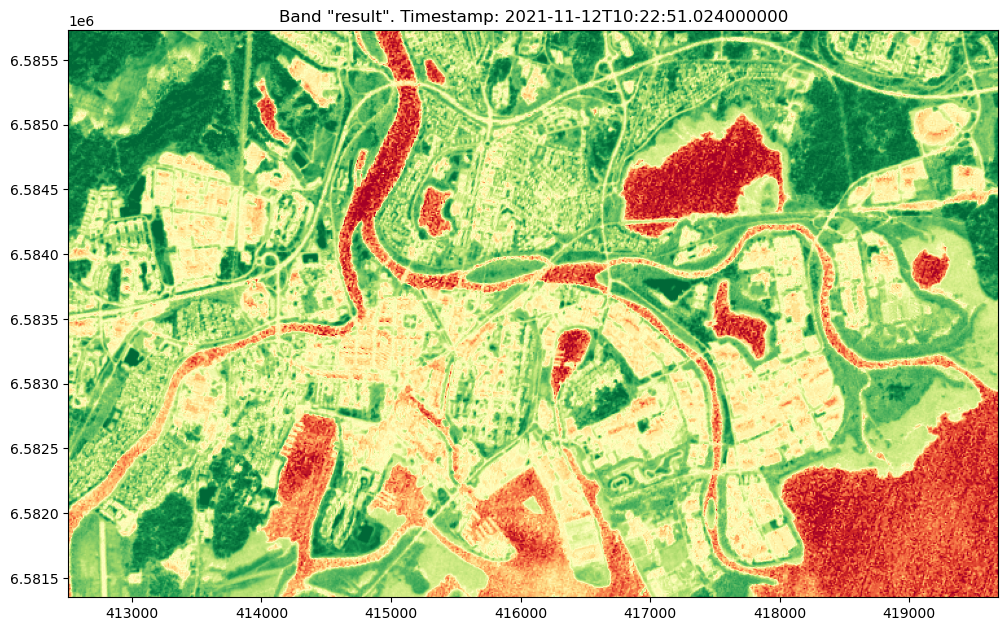

In [ ]:
# Loading the data
cube=connection.load_collection(s2.s2_msi_l2a,
                         spatial_extent=s2.bbox.karlstad_mini_land,
                         temporal_extent=s2.timespans.one_image,
                         bands=['b04','b08'])
# Building and Executing the NDVI Process
res =cube.ndvi(nir="b08",red="b04").download(format="gtiff")
# Visulizing the result
_ = show_result(res,is_ndvi=True)

